<a href="https://colab.research.google.com/github/agneya23/Facial-Expression-Recognition/blob/main/FER%20using%20CNNs%20and%20RAUs/RAU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

A Code Implementation of the Research Paper:

Facial Emotion Recognition using Representational Autoencoder Units.

In [ ]:
# Mount the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Import Libraries
import os
import shutil
import copy
import numpy as np
import matplotlib.pyplot as plt
import torch
import torchvision
from torchvision import datasets, models, transforms 
from torchvision.io import read_image
import cv2
if torch.cuda.is_available():
    device = torch.device("cuda:0")
    print("GPU")
else:
    device = torch.device("cpu")
    print("CPU")

GPU


In [ ]:
# Define Paths
path = '/content/drive/MyDrive/AI_DS_ML_DL/Projects (Self)/FER/FER_CNN_RAU/'
path_jaffe = path + 'jaffe/'
path_rau_data = path + 'RAU Data/'
path_test = path_rau_data + 'Test/'
path_HA = path_rau_data + 'HA/'
path_SA = path_rau_data + 'SA/'
path_FE = path_rau_data + 'FE/'
path_DI = path_rau_data + 'DI/'
path_SU = path_rau_data + 'SU/'
path_NE = path_rau_data + 'NE/'
path_AN = path_rau_data + 'AN/'

In [ ]:
# Load the Data
AN, DI, FE, HA, NE, SA, SU = [], [], [], [], [], [], []
for idx, name in enumerate(os.listdir(path_AN)):
    img_path = path_AN + name
    img = cv2.imread(img_path, 0)
    img = transforms.ToTensor()(img)
    AN.append(transforms.Resize([64, 64])(img)) 
for idx, name in enumerate(os.listdir(path_DI)):
    img_path = path_DI + name
    img = plt.imread(img_path)
    img = transforms.ToTensor()(img)
    DI.append(transforms.Resize([64, 64])(img))
for idx, name in enumerate(os.listdir(path_FE)):
    img_path = path_FE + name
    img = plt.imread(img_path)
    img = transforms.ToTensor()(img)
    FE.append(transforms.Resize([64, 64])(img))
for idx, name in enumerate(os.listdir(path_HA)):
    img_path = path_HA + name
    img = plt.imread(img_path)
    img = transforms.ToTensor()(img)
    HA.append(transforms.Resize([64, 64])(img))
for idx, name in enumerate(os.listdir(path_NE)):
    img_path = path_NE + name
    img = plt.imread(img_path)
    img = transforms.ToTensor()(img)
    NE.append(transforms.Resize([64, 64])(img))
for idx, name in enumerate(os.listdir(path_SA)):
    img_path = path_SA + name
    img = plt.imread(img_path)
    img = transforms.ToTensor()(img)
    SA.append(transforms.Resize([64, 64])(img))
for idx, name in enumerate(os.listdir(path_SU)):
    img_path = path_SU + name
    img = plt.imread(img_path)
    img = transforms.ToTensor()(img)
    SU.append(transforms.Resize([64, 64])(img))

/usr/local/lib/python3.7/dist-packages/torchvision/transforms/functional.py:114: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  img = torch.from_numpy(pic.transpose((2, 0, 1))).contiguous()


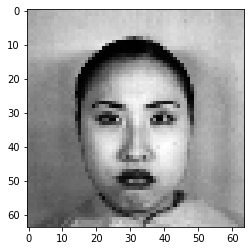

In [ ]:
# An example of an image in the dataset
a = torch.squeeze(AN[0])
plt.imshow(a, cmap='gray')

In [ ]:
# Prepare Autoencoder Model
class rau(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.first_linear = torch.nn.Linear(4096, 2800)
        self.second_linear = torch.nn.Linear(2800, 500)
        self.third_linear = torch.nn.Linear(500, 2800)
        self.fourth_linear = torch.nn.Linear(2800, 4096)

        self.first_relu = torch.nn.ReLU()
        self.second_relu = torch.nn.ReLU()
        self.third_relu = torch.nn.ReLU()
        self.fourth_tanh = torch.nn.Tanh()

    def forward(self, input):
        self.out1 = self.first_linear(input)
        self.out1 = self.first_relu(self.out1)
        self.out2 = self.second_linear(self.out1)
        self.out2 = self.second_relu(self.out2)
        self.out3 = self.third_linear(self.out2)
        self.out3 = self.third_relu(self.out3)
        self.out4 = self.fourth_linear(self.out3)
        self.out4 = self.fourth_tanh(self.out4)
        return self.out4

In [ ]:
def train(data, model, optimizer, epochs):
    rep = 0
    cos = torch.nn.CosineSimilarity(dim=0)
    loss, train_loss = 0.0, 0.0
    best_loss = float('inf')
    best_model_wts = copy.deepcopy(model.state_dict())
    for i in range(1, epochs+1):
        for each in data:
            each = torch.squeeze(each)
            each = torch.flatten(each).to(device)
            if each.shape == torch.Size([4096]):
                output = model.forward(each)
                if i == epochs:
                    rep += output
                loss = cos(each, output)
                train_loss += loss
                optimizer.zero_grad()
                loss.backward(retain_graph=True)
                optimizer.step()
        train_loss /= len(data)
        if train_loss < best_loss:
            best_loss = train_loss
            best_model_wts = copy.deepcopy(model.state_dict())
        if i == 1 or i%20 == 0:
            print('Epoch {}: {}'.format(i, train_loss))
    rep /= len(data)
    print()
    return rep

In [ ]:
# Train AUs
print('Train Losses for AN:')
RAU1 = rau().to(device)
optimizer1 = torch.optim.SGD(RAU1.parameters(), lr=0.001, momentum=0.7)
AN_rep = train(AN, RAU1, optimizer1, 20)

print('Train Losses for DI:')
RAU2 = rau().to(device)
optimizer2 = torch.optim.SGD(RAU2.parameters(), lr=0.01, momentum=0.8)
DI_rep = train(DI, RAU2, optimizer2, 40)

print('Train Losses for FE:')
RAU3 = rau().to(device)
optimizer3 = torch.optim.SGD(RAU3.parameters(), lr=0.01, momentum=0.8)
FE_rep = train(FE, RAU3, optimizer3, 40)

print('Train Losses for HA:')
RAU4 = rau().to(device)
optimizer4 = torch.optim.SGD(RAU4.parameters(), lr=0.01, momentum=0.9)
HA_rep = train(HA, RAU4, optimizer4, 40)

print('Train Losses for NE:')
RAU5 = rau().to(device)
optimizer5 = torch.optim.SGD(RAU5.parameters(), lr=0.001, momentum=0.7)
NE_rep = train(NE, RAU5, optimizer5, 40)

print('Train Losses for SA:')
RAU6 = rau().to(device)
optimizer6 = torch.optim.SGD(RAU6.parameters(), lr=0.001, momentum=0.9)
SA_rep = train(SA, RAU6, optimizer6, 40)

print('Train Losses for SU:')
RAU7 = rau().to(device)
optimizer7 = torch.optim.SGD(RAU7.parameters(), lr=0.01, momentum=0.7)
SU_rep = train(SU, RAU7, optimizer7, 40)

Train Losses for AN:
Epoch 1: -0.13555243611335754
Epoch 20: -0.9997566938400269

Train Losses for DI:
Epoch 1: -0.4540119171142578
Epoch 20: -0.9122622609138489
Epoch 40: -0.9206414222717285

Train Losses for FE:
Epoch 1: -0.494598388671875
Epoch 20: -0.8835468292236328
Epoch 40: -0.8889544010162354

Train Losses for HA:
Epoch 1: -0.4611608684062958
Epoch 20: -0.8431786894798279
Epoch 40: -0.8455126285552979

Train Losses for NE:
Epoch 1: -0.07998353242874146
Epoch 20: -0.8734780550003052
Epoch 40: -0.8812183737754822

Train Losses for SA:
Epoch 1: -0.10544168949127197
Epoch 20: -0.8398221731185913
Epoch 40: -0.8407687544822693

Train Losses for SU:
Epoch 1: -0.42000651359558105
Epoch 20: -0.8796833157539368
Epoch 40: -0.88216632604599



In [ ]:
# Make Predictions
test = []
label_encoding = {'AN': 0, 'DI': 1, 'FE': 2, 'HA': 3, 'NE': 4, 'SA': 5, 'SU': 6}

for name in os.listdir(path_test):
    img_path = path_test + name
    img = cv2.imread(img_path, 0)
    img = transforms.ToTensor()(img)
    img = transforms.Resize([64, 64])(img)
    label = name[3:5]
    label_en = label_encoding[label]
    test.append( (img, label_en) )

cos = torch.nn.CosineSimilarity(dim=0)
count = 0

for img, label_en in test:
    losses = []
    img = torch.reshape(img, [4096])
    losses.append(cos(img, AN_rep.cpu()))
    losses.append(cos(img, DI_rep.cpu()))
    losses.append(cos(img, FE_rep.cpu()))
    losses.append(cos(img, HA_rep.cpu()))
    losses.append(cos(img, NE_rep.cpu()))
    losses.append(cos(img, SA_rep.cpu()))
    losses.append(cos(img, SU_rep.cpu()))
    m1 = min(losses)
    label1 = losses.index(m1)
    losses.pop(label1)
    m2 = min(losses)
    label2 = losses.index(m2)
    if label_en == label1 or label_en == label2:
        count += 1

acc = count/len(test)
print('The Test Acc. is: {} %'.format(acc*100))

The Test Acc. is: 48.97959183673469 %


The accuracy achieved is comparable to the results obtained in the research paper.

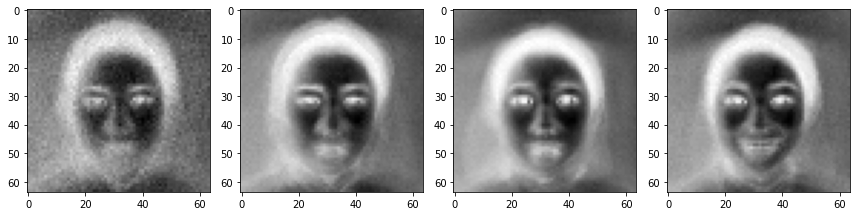

In [ ]:
# Display learned Representations
plt.rcParams["figure.figsize"] = [12.00, 3.00]
plt.rcParams["figure.autolayout"] = True
# ANGER
plt.subplot(1, 4, 1)
img = torch.reshape(AN_rep, [64, 64])
img = img.cpu()
img = torch.detach(img).numpy()
plt.imshow(img, cmap='gray')
# DISGUST
plt.subplot(1, 4, 2)
img = torch.reshape(DI_rep, [64, 64])
img = img.cpu()
img = torch.detach(img).numpy()
plt.imshow(img, cmap='gray')
# FEAR
plt.subplot(1, 4, 3)
img = torch.reshape(FE_rep, [64, 64])
img = img.cpu()
img = torch.detach(img).numpy()
plt.imshow(img, cmap='gray')
# HAPPY
plt.subplot(1, 4, 4)
img = torch.reshape(HA_rep, [64, 64])
img = img.cpu()
img = torch.detach(img).numpy()
plt.imshow(img, cmap='gray')

plt.show()

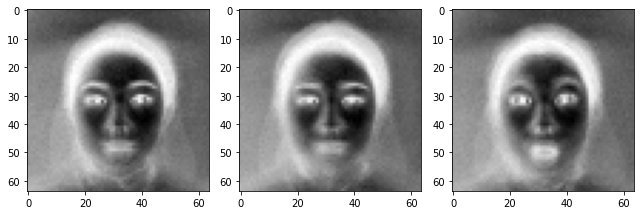

In [ ]:
# Display learned Representations
plt.rcParams["figure.figsize"] = [9.00, 3.00]
plt.rcParams["figure.autolayout"] = True
# NEUTRAL
plt.subplot(1, 3, 1)
img = torch.reshape(NE_rep, [64, 64])
img = img.cpu()
img = torch.detach(img).numpy()
plt.imshow(img, cmap='gray')
# SAD
plt.subplot(1, 3, 2)
img = torch.reshape(SA_rep, [64, 64])
img = img.cpu()
img = torch.detach(img).numpy()
plt.imshow(img, cmap='gray')
# SURPRISE
plt.subplot(1, 3, 3)
img = torch.reshape(SU_rep, [64, 64])
img = img.cpu()
img = torch.detach(img).numpy()
plt.imshow(img, cmap='gray')

plt.show()

Specific features are learned for representation of each class of emotion. The Autoencoder Model learns to give more importance to the muscles of the eyebrows and the mouth in order to distinguish between the emotions. 

The represenatation of 'SURPRISE' has a mouth wide open and with eyebrows fully raised. For 'SAD', one can make out the eyebrow and mouth structure to be similar to that of a sad person. For 'HAPPY', the model learns that a smile created by the facial muscles is indicative of Happiness. 

The model also, however, has  similar representations for emotions such as 'ANGER', 'DISGUST' and 'NEUTRAL'. This is due to the fact that these emotions are quite similar to one another and it is hard to distinguish between them.